### Importamos las librerias que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [45]:
# Importamos los datos
df = pd.read_excel('Datasets\BBDD_Hospitalización.xlsx', engine="openpyxl")
df.head(3)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0


-------------------------------

### Empezamos a anlaizar los datos

In [46]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

#### Valores duplicados

In [48]:
# Se filtran las filas duplicadas
df[df.duplicated(keep=False)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
36,62.0,NO,NO,16.0,NO,SI,OROQUINOLONAS,12.0,NO,SI,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
37,69.0,NO,NO,17.0,SI,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
39,66.0,NO,NO,6.4,NO,SI,OTROS,12.0,NO,SI,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,59.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
562,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Se eliminan las filas duplicadas en todas las columnas manteniendo la primera aparición
df = df.drop_duplicates(subset=df.columns, keep='first')
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [50]:
# Se verifica que ya no hay filas duplicadas
df[df.duplicated(keep=False)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [51]:
# se resetean los indexs
df = df.reset_index(drop=True)

#### Valores Nulos

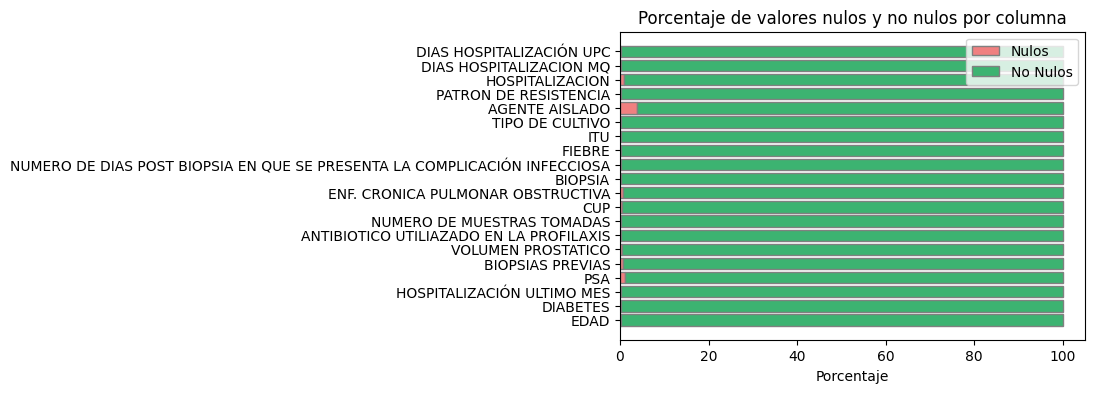

In [52]:
# Contar valores nulos y no nulos por columna
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

# Calcular los porcentajes
total_counts = null_counts + non_null_counts
null_percentage = (null_counts / total_counts) * 100
non_null_percentage = (non_null_counts / total_counts) * 100

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(6, 4))

# Crear las barras apiladas
bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')  # Color rojo claro para nulos
bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='mediumseagreen', edgecolor='grey', label='No Nulos')  # Verde para no nulos

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje')
ax.set_title(f'Porcentaje de valores nulos y no nulos por columna')
ax.legend()

# Mostrar el gráfico
plt.show()


In [53]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in df.columns:
    print(f'Hay {df[column].isna().sum()} valores nulos en {column}')

Hay 1 valores nulos en EDAD
Hay 1 valores nulos en DIABETES
Hay 1 valores nulos en HOSPITALIZACIÓN ULTIMO MES
Hay 5 valores nulos en PSA
Hay 3 valores nulos en BIOPSIAS PREVIAS
Hay 2 valores nulos en VOLUMEN PROSTATICO
Hay 1 valores nulos en ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
Hay 1 valores nulos en NUMERO DE MUESTRAS TOMADAS
Hay 2 valores nulos en CUP
Hay 3 valores nulos en ENF. CRONICA PULMONAR OBSTRUCTIVA
Hay 1 valores nulos en BIOPSIA
Hay 1 valores nulos en NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
Hay 1 valores nulos en FIEBRE
Hay 1 valores nulos en ITU
Hay 1 valores nulos en TIPO DE CULTIVO
Hay 18 valores nulos en AGENTE AISLADO
Hay 1 valores nulos en PATRON DE RESISTENCIA
Hay 4 valores nulos en HOSPITALIZACION
Hay 1 valores nulos en DIAS HOSPITALIZACION MQ
Hay 1 valores nulos en DIAS HOSPITALIZACIÓN UPC


En principio se observa que todas las columnas tienen como mínimo 1 valor nulo y que la máxima cantidad de nulos es en la columna AGENTE AISLADO, con 18 valores 

In [54]:
cantidad_registros_nulos = len(df[df.isna().any(axis=1)])
porcentaje = round((cantidad_registros_nulos / len(df)) * 100,2)

print(f'Hay {cantidad_registros_nulos} registros con algún nulo, lo que representa el {porcentaje}% del total de registros')

Hay 28 registros con algún nulo, lo que representa el 6.07% del total de registros


Se tienen 28 registros donde hay al menos un valor nulo, esto representa el 6% de los registros disponibles, por lo que se decide borrarlos.

In [55]:
# Filtrar filas con valores nulos
df[df.isna().any(axis=1)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
70,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
86,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
93,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
94,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
97,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
100,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
103,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [56]:
# Elimino los valores nulos
df = df.dropna()

# Ahora identifico nuevamente la cantidad de valores nulos que qudaron en el dataset
for column in df.columns:
    print(f'Hay {df[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en EDAD
Hay 0 valores nulos en DIABETES
Hay 0 valores nulos en HOSPITALIZACIÓN ULTIMO MES
Hay 0 valores nulos en PSA
Hay 0 valores nulos en BIOPSIAS PREVIAS
Hay 0 valores nulos en VOLUMEN PROSTATICO
Hay 0 valores nulos en ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
Hay 0 valores nulos en NUMERO DE MUESTRAS TOMADAS
Hay 0 valores nulos en CUP
Hay 0 valores nulos en ENF. CRONICA PULMONAR OBSTRUCTIVA
Hay 0 valores nulos en BIOPSIA
Hay 0 valores nulos en NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
Hay 0 valores nulos en FIEBRE
Hay 0 valores nulos en ITU
Hay 0 valores nulos en TIPO DE CULTIVO
Hay 0 valores nulos en AGENTE AISLADO
Hay 0 valores nulos en PATRON DE RESISTENCIA
Hay 0 valores nulos en HOSPITALIZACION
Hay 0 valores nulos en DIAS HOSPITALIZACION MQ
Hay 0 valores nulos en DIAS HOSPITALIZACIÓN UPC


### Ahora veo los tipos de datos que tengo

In [57]:
def verificar_tipo_datos(df):
    '''
    Verifica el tipo de dato contenido en cada columna de un dataframe.
    Tiene como parámetro el dataframe a evaluar y devuelve un resumen de el/los tipos de datos.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
        
    return df_info

In [58]:
verificar_tipo_datos(df)

,nombre_campo,tipo_datos
0,EDAD,[<class 'float'>]
1,DIABETES,[<class 'str'>]
2,HOSPITALIZACIÓN ULTIMO MES,[<class 'str'>]
3,PSA,[<class 'float'>]
4,BIOPSIAS PREVIAS,[<class 'str'>]
5,VOLUMEN PROSTATICO,[<class 'str'>]
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,[<class 'str'>]
7,NUMERO DE MUESTRAS TOMADAS,[<class 'float'>]
8,CUP,[<class 'str'>]
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,[<class 'str'>]


Vamos a analizar la columnas que cuenta con dos tipos de datos diferentes

In [59]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique()

array([1, 2, 3, 5, 9, 'NO'], dtype=object)

Se puede observar que es una columna de números enteros pero al tener un 'NO' se combierte a dos tipo de datos.

Se procede a contar cuantos valores NO hay.

In [60]:
total_NO = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts().get('NO', 0)
total_filas = len(df)
porcentaje = round((total_NO / total_filas) * 100,2)

print(f'Hay un total de {total_filas} registros, de los cuales {total_NO} son "NO", lo que representa el {porcentaje}%')


Hay un total de 433 registros, de los cuales 408 son "NO", lo que representa el 94.23%


In [62]:
# Se analiza el valor 'NO' en el contexto de los demas datos.
df[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == 'NO']

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
28,75.0,NO,NO,21.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
32,63.0,NO,NO,10.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
453,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
454,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
455,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Al ver la cantidad de valores 'NO' que tiene la columna y comparado con la información de las otras columnas, se asume que NO significa que la persona no tuvo internación, por lo que se cambiará ese valor por 0 dias

In [63]:
# Se cambian los valores NO por 0
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0)
# Se verifican los valores únicos y el tipo de dato
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique(), df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].apply(type).unique()

(array([1, 2, 3, 5, 9, 0]), array([<class 'int'>], dtype=object))

Ahora a las columnas númericas se cambia el tipo de datos por el tipo de entero

In [64]:
# Se cambian los siguientes tipo de datos
df['EDAD'] = df['EDAD'].astype(int)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].astype(int)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].astype(int)

Se observa las variables categóricas de columnas para buscar unificar en caso de ser necesario

In [65]:
# Se revisan las categorías de la columna 
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'OTROS', 'FLUOROQUINOLONA_AMINOGLICÓSIDO'],
      dtype=object)

In [66]:
# Se renombran
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 
                                                                                                      'FLUOROQUINOLONA_AMINOGLICOSIDO')


In [67]:
# Se revisan las categorías de la columna 
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI'], dtype=object)

In [68]:
# Se renombran
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 
                                                                                          'SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 
                                                                                          'SI')

In [69]:
# Se revisan las categorías de la columna 
df['BIOPSIA'].unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'ADENOCARCINOMA GLEASON 7',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

In [70]:
# Se renombran
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 6 ',
                                      'ADENOCARCINOMA GLEASON 6')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7 ',
                                      'ADENOCARCINOMA GLEASON 7')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 8 ',
                                      'ADENOCARCINOMA GLEASON 8')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 9 ',
                                      'ADENOCARCINOMA GLEASON 9')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 10 ',
                                      'ADENOCARCINOMA GLEASON 10')

In [71]:
# Se revisan las categorías de la columna 
df['PATRON DE RESISTENCIA'].unique()

array(['NO', ' AMPI R, CIPRO R, GENTA R, SULFA M R',
       'RESISTENTE A AMPI, CIPRO Y GENTA',
       'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
       'MULTI SENSIBLE'], dtype=object)

In [72]:
# Se renombran
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 
                                                                  'R AMPI, R GENTA, R SULFA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 
                                                                  'R AMPI, R CIPRO, R GENTA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
                                                                  'R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA')

In [73]:
verificar_tipo_datos(df)

,nombre_campo,tipo_datos
0,EDAD,[<class 'int'>]
1,DIABETES,[<class 'str'>]
2,HOSPITALIZACIÓN ULTIMO MES,[<class 'str'>]
3,PSA,[<class 'float'>]
4,BIOPSIAS PREVIAS,[<class 'str'>]
5,VOLUMEN PROSTATICO,[<class 'str'>]
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,[<class 'str'>]
7,NUMERO DE MUESTRAS TOMADAS,[<class 'int'>]
8,CUP,[<class 'str'>]
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,[<class 'str'>]


In [74]:
nombres_nuevos = {
    "EDAD": "Edad",
    "DIABETES": "Diabetes",
    "HOSPITALIZACIÓN ULTIMO MES": "Hospitaliz_ult_mes",
    "PSA": "PSA",
    "BIOPSIAS PREVIAS": "Biopsias_prev",
    "VOLUMEN PROSTATICO": "Vol_prostatico",
    "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "Antibiotico_en_profilaxis",
    "NUMERO DE MUESTRAS TOMADAS": "Nro_muestras",
    "CUP": "CUP",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA": "Epoc",
    "BIOPSIA": "Biopsia",
    "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA": "Nro_dias_con_infecc",
    "FIEBRE": "Fiebre",
    "ITU": "ITU",
    "TIPO DE CULTIVO": "Tipo_cultivo",
    "AGENTE AISLADO": "Agente_aislado",
    "PATRON DE RESISTENCIA": "Patron_resistencia",
    "HOSPITALIZACION": "Hospitalizacion",
    "DIAS HOSPITALIZACION MQ": "Dias_hosp_mq",
    "DIAS HOSPITALIZACIÓN UPC": "Dias_hosp_upc"
}
df.rename(columns=nombres_nuevos, inplace=True)
df.head(3)

,Edad,Diabetes,Hospitaliz_ult_mes,PSA,Biopsias_prev,Vol_prostatico,Antibiotico_en_profilaxis,Nro_muestras,CUP,Epoc,Biopsia,Nro_dias_con_infecc,Fiebre,ITU,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hosp_mq,Dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3


------------------------------

### Carga de los datos a csv

In [76]:
df.to_csv('Datasets/hospitalizacion_limpio.csv', index=False, encoding='utf-8')

-----------------------------------------

In [2]:
df = pd.read_csv('Datasets/hospitalizacion_limpio.csv')
df

,Edad,Diabetes,Hospitaliz_ult_mes,PSA,Biopsias_prev,Vol_prostatico,Antibiotico_en_profilaxis,Nro_muestras,CUP,Epoc,Biopsia,Nro_dias_con_infecc,Fiebre,ITU,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hosp_mq,Dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


-----------------------

## Variables numéricas

Se observan el resumen estadístico para las variables numéricas y a continuacion se visualizan las distribuciones de cada una de las columans

In [3]:
df.describe()

,Edad,PSA,Nro_muestras,Nro_dias_con_infecc,Dias_hosp_mq,Dias_hosp_upc
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


In [4]:
def boxplot(df, columna):
    '''
    Realiza un boxplot sencillo para una columna determinada.
    '''
    plt.figure(figsize=(15, 2))
    sns.boxplot(data=df, x=df[columna])
    plt.title(f'Boxplot de la columna {columna}')
    plt.show()

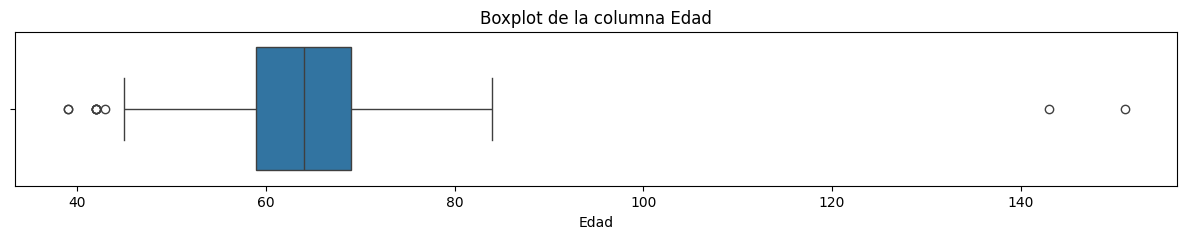

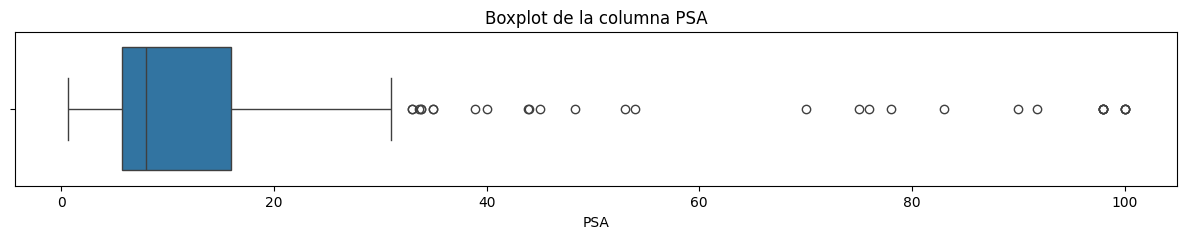

In [5]:
# Visualización de Edad y PSA
categorias = ['Edad', 'PSA']

for c in categorias:
    boxplot(df, c)

In [6]:
def histplot_categoricas(df, nombres_columnas):
    '''
    Crea un histograma de las 4 variables categoricas, especificamente en 2 filas y 2 columnas
    '''
        ## Crear un grid de 2x2 para los histogramas
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))

    # Obtener las columnas categóricas
    # Iterar a través de las columnas y crear histogramas en cada eje
    for i, column in enumerate(nombres_columnas):
        row = i // 2
        col = i % 2
        sns.histplot(data=df, x=column, ax=axes[row, col], multiple="dodge")

    # Ajustar los espacios entre los gráficos
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

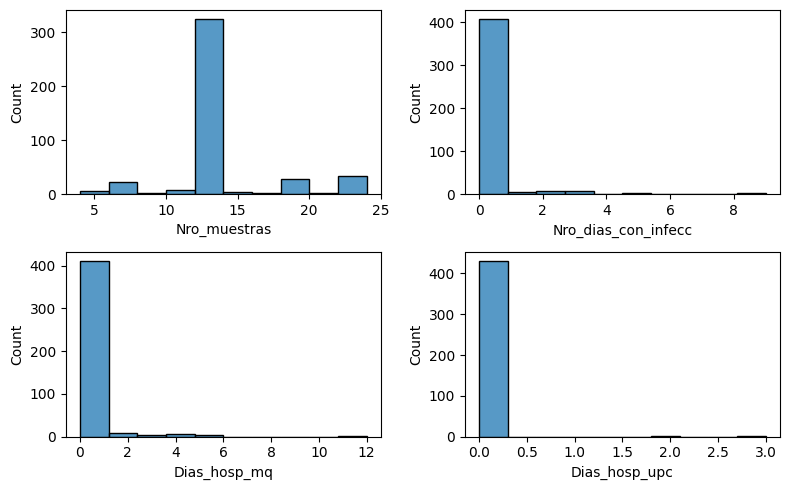

In [7]:
# Visualización para las restantes categóricas
columnas_categoricas = ['Nro_muestras', 'Nro_dias_con_infecc', 'Dias_hosp_mq', 'Dias_hosp_upc']
histplot_categoricas(df, columnas_categoricas)

Se realizan algunos cálculos de utilidad para analizar las visualizaciones anteriores

In [8]:
def bigote_max(columna):
    '''
    Calcula el valor del bigote máximo y la cantidad de valores que se encuentran como valores atípicos.
    '''
    # Cuartiles
    q1 = columna.describe()[4]
    q3 = columna.describe()[6]

    # Valor del vigote
    bigote_max = round(q3 + 1.5*(q3 - q1), 2)
    print(f'El bigote superior de la variable {columna.name} se ubica en:', bigote_max)

    # Cantidad de atípicos
    print(f'Hay {(columna > bigote_max).sum()} valores atípicos en la variable {columna.name}')

In [9]:
def valor_mas_frecuente(df, columna):
    '''
    Calcula el valore mas frecuente en una columna, su cantidad y porcentaje respecto del total.
    '''
    # Frecuencias
    moda = df[columna].mode()[0]
    # Cantidad de la mayor frecuencia
    cantidad = (df[columna] == moda).sum()
    # Total de registros
    total = df[columna].count()
    # Porcentaje de la mayor frecuencia
    porcentaje = round(cantidad/total * 100,2)
    print(f'Valor mas frecuente de {columna} es {moda}, con una cantidad de {cantidad} y representa el {porcentaje}%.')

In [10]:
# Se calcula cual es el límite del bigote máximo
bigote_max(df['PSA'])

# Se calcula el porcentaje del valor mas frecuente para esta variable
valor_mas_frecuente(df, 'Nro_muestras')

valor_mas_frecuente(df, 'Nro_dias_con_infecc')
# Se analizan cuantos pacientes sí tienen complicaciones
con_complicaciones = (df['Nro_dias_con_infecc'] > 0)
print(f'Hay {con_complicaciones.sum()} que presentaron complicaciones post la biopsia.')

# Se calcula el porcentaje del valor mas frecuente para esta variable
valor_mas_frecuente(df, 'Dias_hosp_mq')

# Se calcula el porcentaje del valor mas frecuente para esta variable
valor_mas_frecuente(df, 'Dias_hosp_upc')

El bigote superior de la variable PSA se ubica en: 31.45
Hay 31 valores atípicos en la variable PSA
Valor mas frecuente de Nro_muestras es 12, con una cantidad de 325 y representa el 75.06%.
Valor mas frecuente de Nro_dias_con_infecc es 0, con una cantidad de 408 y representa el 94.23%.
Hay 25 que presentaron complicaciones post la biopsia.
Valor mas frecuente de Dias_hosp_mq es 0, con una cantidad de 410 y representa el 94.69%.
Valor mas frecuente de Dias_hosp_upc es 0, con una cantidad de 430 y representa el 99.31%.


De las visualizaciones anteriores, se ve que la variable edad presenta claramente dos tipos de valores atípicos que pueden observarse en el boxplot, donde tales pacientes tendrían más de 140 años, por lo tanto esos datos se decide borrarlos y recalcular la estadistica

In [11]:
# Se eliminan registros y se verifica su eliminación
df = df[df['Edad'] <= 100]
print('Cantidad de valores mayores a 100 años:', (df['Edad'] > 100).sum())

Cantidad de valores mayores a 100 años: 0


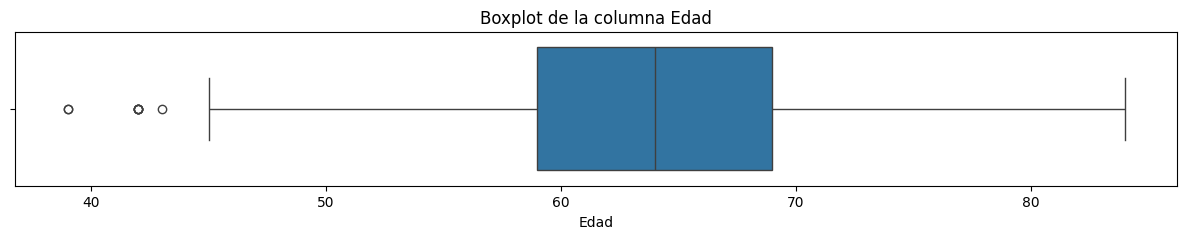

ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA
count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: Edad, dtype: float64


In [12]:
# Se revisa nuevamente el boxplot
boxplot(df, 'Edad')

#Estadísticas de la columna
print('ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA')
print(df['Edad'].describe())

De esta manera, para la variebla **edad** se puede ver que el 75% de las edades se encuentra entre los 39 y 69 años de edad, con una edad promedio de cerca de 64 años. Hay pacientes con mayor edad, llegando a los 84 años. Se aprecian tres casos de pacientes con edades atípicas por debajo de los 45 años

En cuanto a la variable **psa** se aprecia en la visualización que el 75% de los registros tienen concentraciones por debajo de los 16 ng/ml. Por otra parte, hay 31 pacientes que se ubican en por encima de los 31,45 ng/ml considerados estadísticamente atípicos. Si bien la bibliografía consultada no determina valores máximos para esta concentración pero sí indica que es posible hallar valores altos en situaciones específicas, entonces se decide dejarlos en el conjunto de datos

La variable **nro_muestras** indica la cantidad de muestras que son tomadas al momento de la biopsia y se puede ver que se pareciera ser práctica común tomar 12 muestras dado que representan casi el 75% de los casos registrados. En algunos se llegaron a tomar 18 y 24 muestras

En relación con los **nro_dias_con_infecc** se ve que el 94.2% de los pacientes presentaron 0 días, por lo tanto se considera que no tuvieron infección. Por otra parte, 25 pacientes presentaron infección desde 1 a 3 días luego de la intervención

En cuanto a las variables **dias_hosp_mq** y **dias_hosp_ipc** se observan que son variables con 94.66% y 99.3% de valores 0, es decir, que el paciente no fue hospitalizado ni por razones médico quirúrgicas ni en estado crítico. Por otra parte, considerando que la varible objetivo es predecir qué pacientes serán o no hospitalizados, se considera que esta variable podría ser redundante. Se decide eliminar estas columnas del conjuto de datos

In [13]:
columnas_a_eliminar = ['Dias_hosp_mq','Dias_hosp_upc']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['Edad', 'Diabetes', 'Hospitaliz_ult_mes', 'PSA', 'Biopsias_prev',
       'Vol_prostatico', 'Antibiotico_en_profilaxis', 'Nro_muestras', 'CUP',
       'Epoc', 'Biopsia', 'Nro_dias_con_infecc', 'Fiebre', 'ITU',
       'Tipo_cultivo', 'Agente_aislado', 'Patron_resistencia',
       'Hospitalizacion'],
      dtype='object')

-----------------------------

## Variables categóricas

En primer lugar se observa el resumen estadístico de las variableas categóricas y luego se visualizan las distribuciones de cada variable

In [14]:
df.describe(include='object')

,Diabetes,Hospitaliz_ult_mes,Biopsias_prev,Vol_prostatico,Antibiotico_en_profilaxis,CUP,Epoc,Biopsia,Fiebre,ITU,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion
count,431,431,431,431,431,431,431,431,431,431,431,431,431,431
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,380,427,387,306,344,428,417,211,395,425,423,423,424,408


In [15]:
def countplot(df, columna):
    '''
    Realiza un countplot sencillo para una columna determinada.
    '''
    plt.figure(figsize=(14, 3))

    sns.countplot(data=df, y=df[columna])

    plt.title(f'Countplot de la columna {columna}')

    # Ajusta los espacios entre subplots y muestra
    plt.tight_layout()
    plt.show()

VISUALIZACIÓN DE LA VARIABLE Diabetes


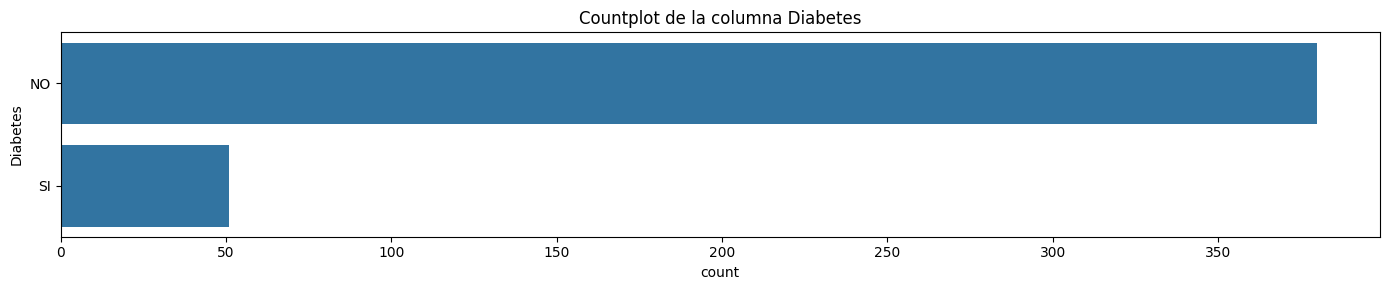

VISUALIZACIÓN DE LA VARIABLE Hospitaliz_ult_mes


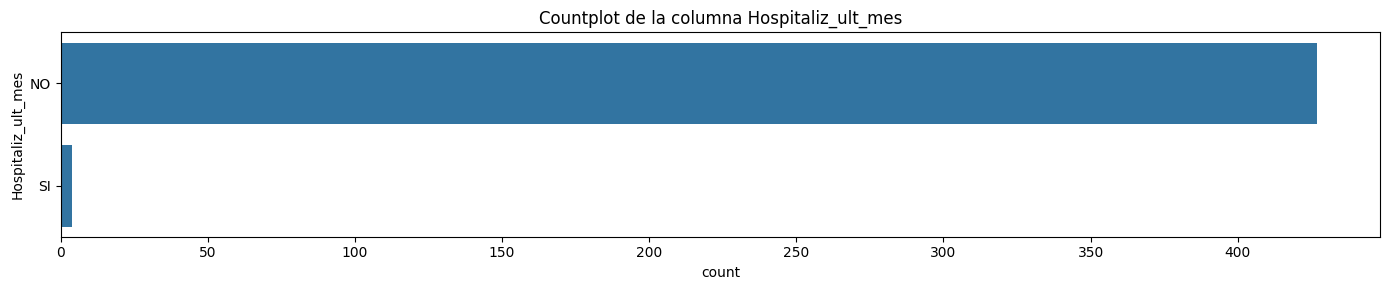

VISUALIZACIÓN DE LA VARIABLE Biopsias_prev


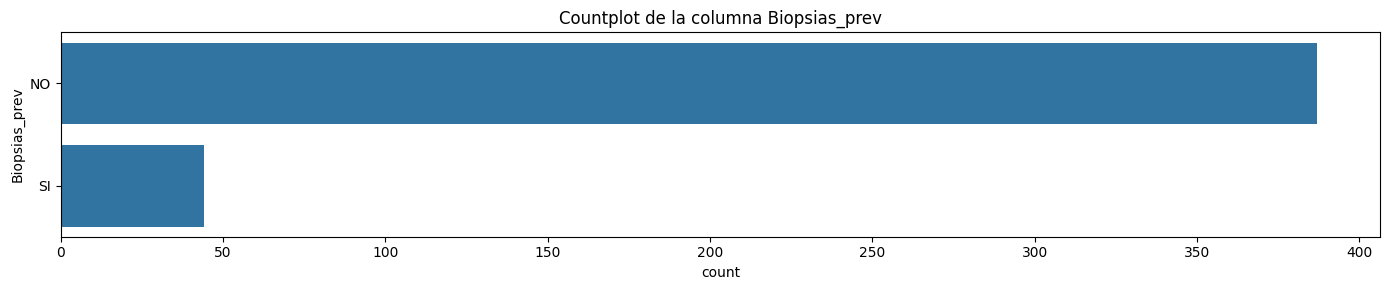

VISUALIZACIÓN DE LA VARIABLE Vol_prostatico


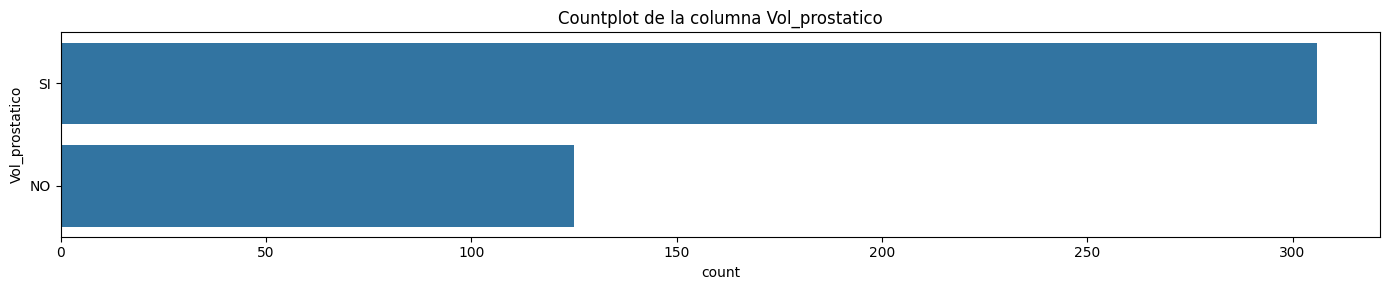

VISUALIZACIÓN DE LA VARIABLE Antibiotico_en_profilaxis


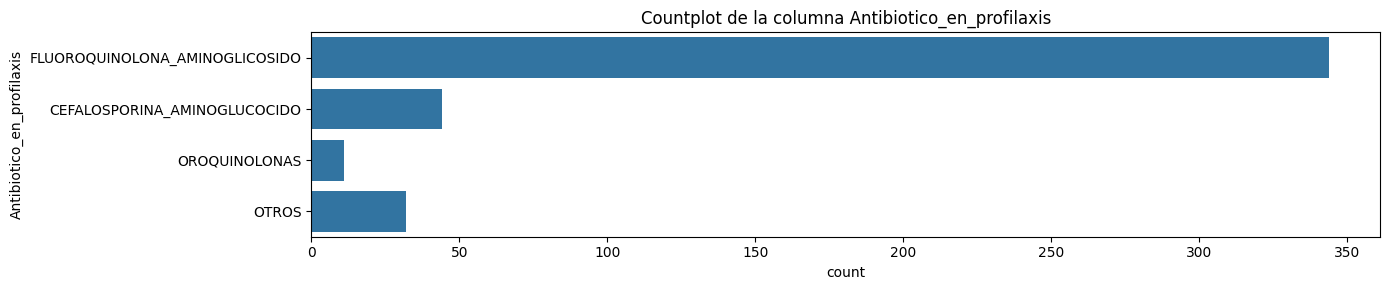

VISUALIZACIÓN DE LA VARIABLE CUP


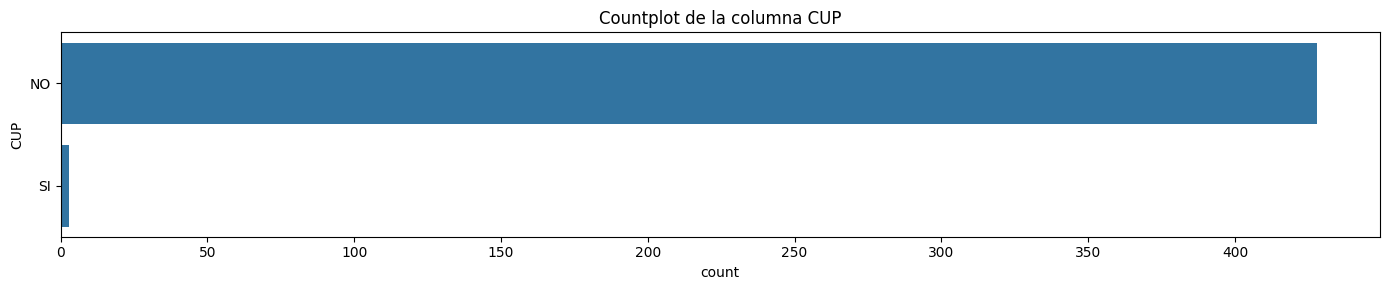

VISUALIZACIÓN DE LA VARIABLE Epoc


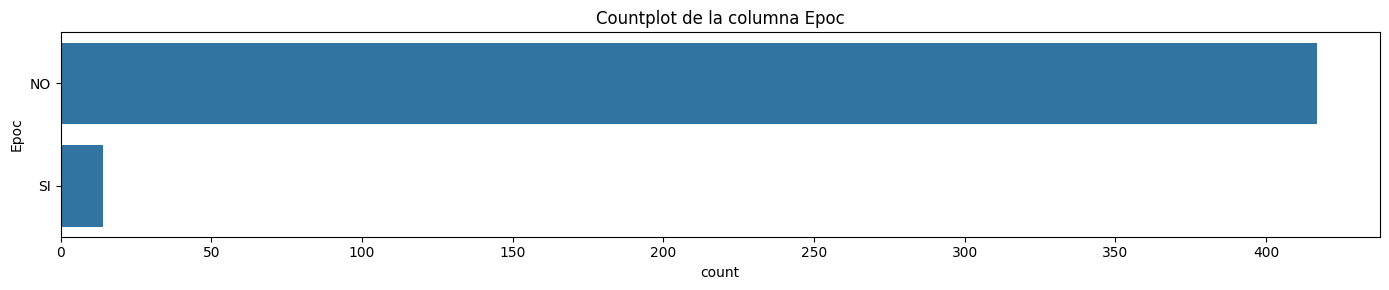

VISUALIZACIÓN DE LA VARIABLE Biopsia


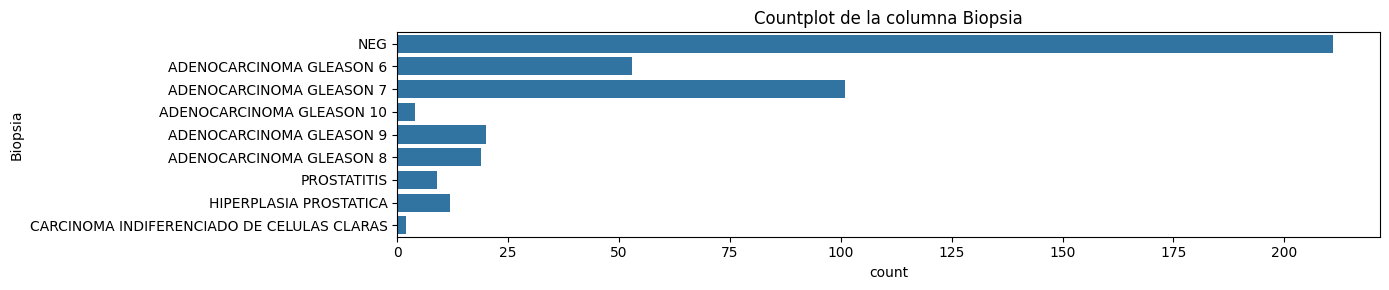

VISUALIZACIÓN DE LA VARIABLE Fiebre


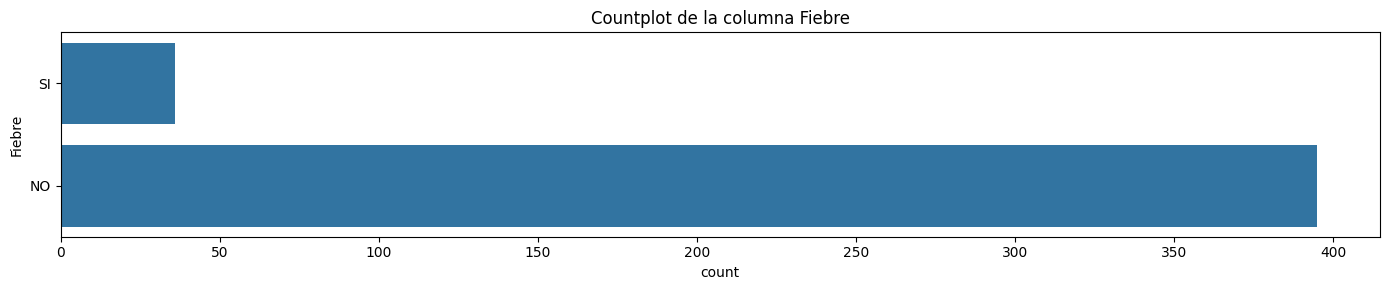

VISUALIZACIÓN DE LA VARIABLE ITU


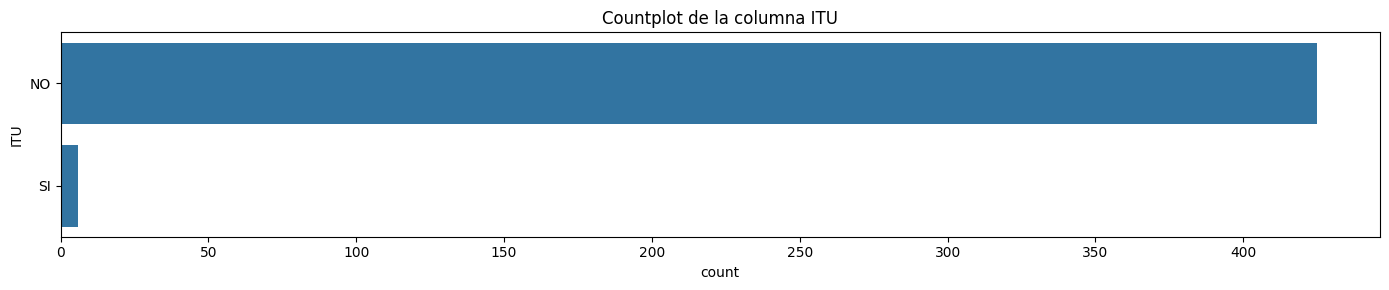

VISUALIZACIÓN DE LA VARIABLE Tipo_cultivo


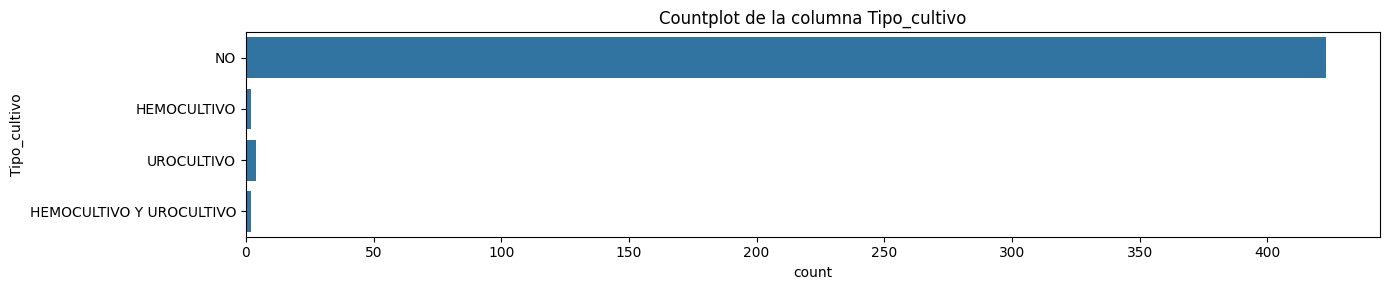

VISUALIZACIÓN DE LA VARIABLE Agente_aislado


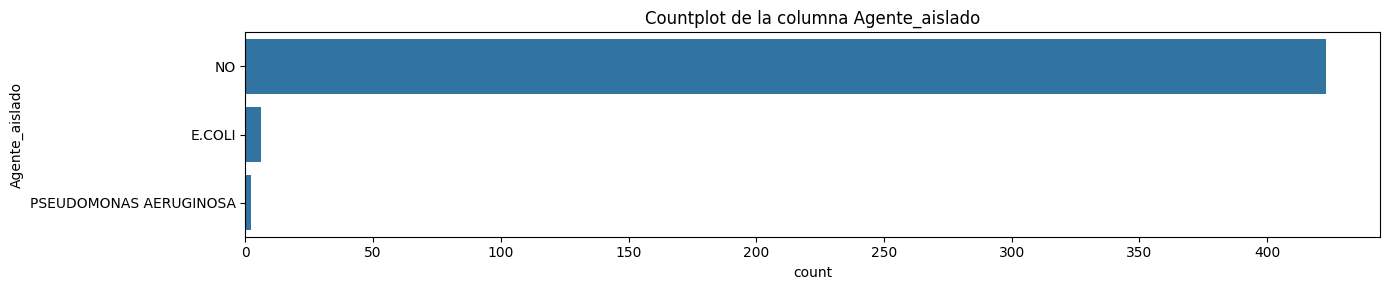

VISUALIZACIÓN DE LA VARIABLE Patron_resistencia


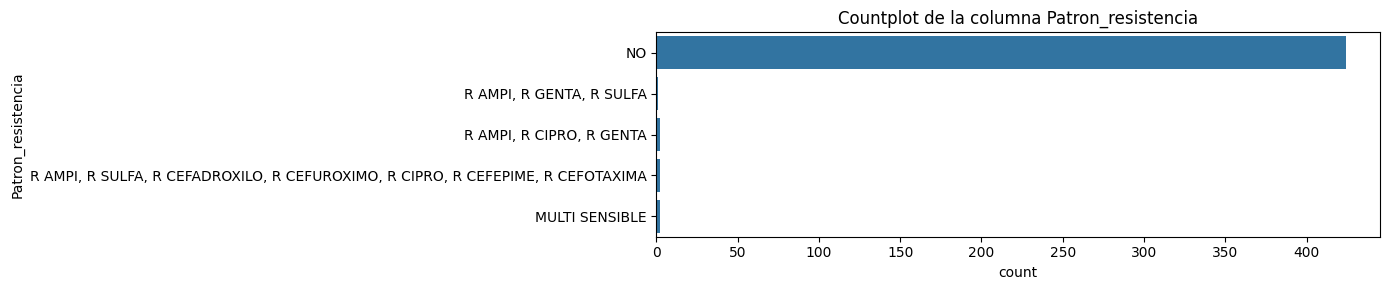

VISUALIZACIÓN DE LA VARIABLE Hospitalizacion


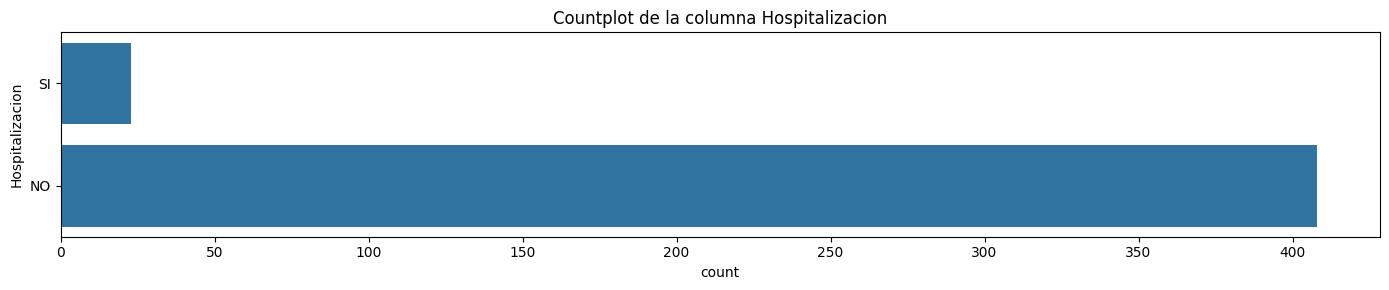

In [16]:
columnas = ['Diabetes', 'Hospitaliz_ult_mes', 'Biopsias_prev', 'Vol_prostatico', 'Antibiotico_en_profilaxis', 'CUP',
            'Epoc', 'Biopsia', 'Fiebre', 'ITU', 'Tipo_cultivo', 'Agente_aislado', 'Patron_resistencia', 'Hospitalizacion']
for c in columnas:
    print(f'VISUALIZACIÓN DE LA VARIABLE {c}')
    countplot(df, c)

Algunas lecturas de las visualizaciones previas son:

* **diabetes**, **hospitaliz_ult_mes**, **biopsias_prev**, **cup**, **epoc**, **nro_dias_con_infeccion**, **fiebre**, **itu** y **hospitalizacion** clasifican la mayor cantidad de pacientes en la categoría de "NO".
* **vol_prostatico** tiene la mayor cantidad de pacientes con "SI".
* **psa** queda con mayoy cantidad de pacientes en el rango de 4 a 31 ng/ml.
* **antibiotico_en_profilaxis** tiene un alto porcentaje en la categoría fluoroquinolona_aminoglicosido.
* **nro_muestras**, como era de esperarse, presenta la mayor cantidad de paciente en el rango de 10 a 15 muestras.
* **biopsia** tiene varias categorías con diferentes cantidades en cada una, es una de las variables con mayor diversidad de informacion. La mayor proporción de pacientes se clasifican en NEG (resultado negativo).
* **tipo_cultivo** tiene un mayor porcentaje de pacientes con "NO", dado que no se realizaron cultivos, pero además presentan otras tres categorías (hemocultivo, urocultivo, hemocultivo y urocultivo) que podrían agruparse en una sola que puede ser 'SI' para describir que se solicitó algún tipo de cultivo. Por otro lado, **agente_aislado** es similar al anterior, donde mayormente es "NO" dado que no se pidió cultivo o que, si se pidió, no se aisló ningún agente. Pero a su vez tiene otras dos categorías con muy pocos pacientes donde el agente ailado es E. Coli o Pseudomonas aeruginosa.
* **patron_resistencia** tiene mayormente pacientes 'NO' que significa que no tienen ninguna resistencia a antibióticos, pero luego aparecen cuatro categorías mas con muy pocos pacientes en cada una con alguna combinación o grupo de antibióticos para los cuales desarrollan resistencia.

En el siguiente heatmap se puede apreciar de manera resumida el porcentaje de datos por cada una de las variables (eje y) y categorías de dichas variables (eje x). Se hace para evaluar si algunas de las variables es constante. En este caso se adopta como variable constante aquellas variables donde una de sus categorías superen el 99% de etiquetas de la misma categoría. Se adopta 99% porque la variable objetivo presenta cerca del 95% de las categorías con una sola clase y se busca eliminar variables con mayor cantidad de valores constantes.

In [18]:
from matplotlib.colors import LinearSegmentedColormap

In [19]:
def heatmap_categoricas(df):
    '''
    Realiza un mapa de calor donde se pueden ver los porcentajes de datos para cada clase en cada variable.
    '''
    # Crea un dataframe de resumen
    summary_df = pd.DataFrame()

    # Iterar a través de cada columna en el DataFrame original
    for column in df.columns:
        # Verificar si la columna es de tipo 'object'
        if df[column].dtype == 'object':
            # Obtener las categorías únicas y sus recuentos
            category_counts = df[column].value_counts(normalize=True)
            
            # Crear un DataFrame temporal para esta columna
            temp_df = pd.DataFrame({
                'Categoría': category_counts.index,
                column: category_counts.values * 100
            })
            
            # Establecer la columna 'Categoría' como índice para el DataFrame temporal
            temp_df.set_index('Categoría', inplace=True)
            
            # Unir el DataFrame temporal al resumen general
            summary_df = pd.concat([summary_df, temp_df], axis=1, sort=True)

    # Reemplazar los valores NaN con "null"
    summary_df = summary_df.fillna(-1)
    
    # crea la visualización
    plt.figure(figsize=(14, 10))

    # Crear una escala de colores personalizada
    def custom_cmap(value, alpha=1.0):
        if value == -1:
            return (1, 1, 1, alpha)  # Blanco para el valor -1
        else:
            color = plt.get_cmap('Reds')(value / 100)
            adjusted_color = (color[0] * 0.9, color[1] * 0.5, color[2] * 0.5, alpha)
            return adjusted_color

    num_colors = 100
    cmap = LinearSegmentedColormap.from_list(
        'custom_cmap', [custom_cmap(i) for i in range(-1, num_colors + 1)], num_colors + 2)

    ax = sns.heatmap(summary_df.transpose(), cmap=cmap, vmin=-1, vmax=num_colors, square=False, 
                    annot=True, fmt=".1f", cbar=False, annot_kws={"color": "white"}, 
                    linewidths=0.5, linecolor='grey')
    plt.title("Mapa de Calor de Porcentajes")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.show()

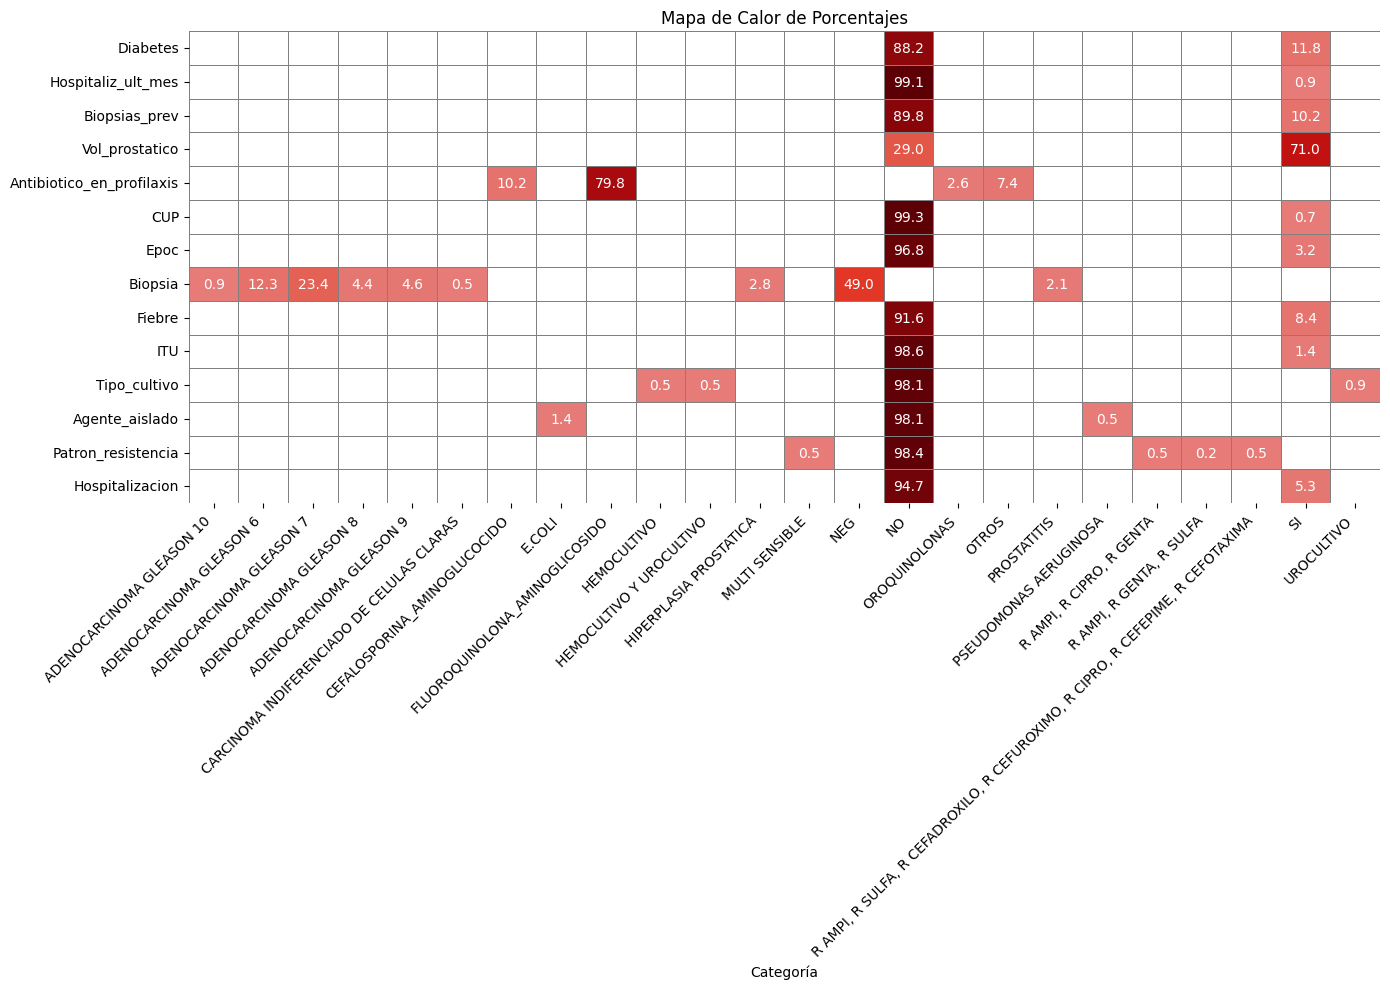

In [20]:
heatmap_categoricas(df)

De este heatmap se identifican a **hospitaliz_ult_mes** y **cup** como variables donde el 99% de los datos es una sola categoría, en todos los caso 'NO', por lo que se decide borrarlos del conjunto de datos.

In [21]:
columnas_a_eliminar = ['Hospitaliz_ult_mes', 'CUP']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['Edad', 'Diabetes', 'PSA', 'Biopsias_prev', 'Vol_prostatico',
       'Antibiotico_en_profilaxis', 'Nro_muestras', 'Epoc', 'Biopsia',
       'Nro_dias_con_infecc', 'Fiebre', 'ITU', 'Tipo_cultivo',
       'Agente_aislado', 'Patron_resistencia', 'Hospitalizacion'],
      dtype='object')

--------------------------

## Codificación del dataset

Como se tienen variables categóricas y se quiere estudiar si hay alta correlación de algunas variables con la variable objetivo, es necesario codificar dichas categorías en forma numérica. Además, este paso es necesario para que los datos puedan ser interpretados por los modelos de Machine Learning. A continuación, se hace la codificación.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
def label_encode_categoricals(df):
    '''
    Genera un nuevo dataframe donde se aplica la codificación de etiquetas (label encoding) a las columnas categóricas
    '''
    # Separar columnas numéricas y categóricas
    numeric_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Crear una copia del DataFrame original
    encoded_df = df.copy()
    
    # Aplicar label encoding a las columnas categóricas
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        encoded_df[col] = label_encoder.fit_transform(encoded_df[col])
    
    return encoded_df

In [27]:
encoded_df = label_encode_categoricals(df)
encoded_df

,Edad,Diabetes,PSA,Biopsias_prev,Vol_prostatico,Antibiotico_en_profilaxis,Nro_muestras,Epoc,Biopsia,Nro_dias_con_infecc,Fiebre,ITU,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion
0,53,0,4.0,0,1,1,12,0,7,1,1,0,2,1,1,1
1,56,0,7.7,0,1,1,12,0,7,1,1,0,2,1,1,1
2,57,0,29.0,1,1,1,24,0,7,1,1,0,0,0,3,1
3,56,0,7.0,0,1,1,12,0,7,1,1,0,2,1,1,1
4,55,0,29.0,1,1,1,24,0,7,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,1,12,0,2,0,0,0,2,1,1,0
429,70,1,18.0,0,1,1,12,0,7,0,0,0,2,1,1,0
430,75,0,75.0,0,1,1,12,0,3,0,0,0,2,1,1,0
431,67,0,6.0,0,1,1,12,0,1,0,0,0,2,1,1,0


--------------

## Correlación

Para finalizar, se analiza la correlación entre las variables que quedan del dataset para identificar variables con alta correlación entre sí o con la variable objetivo.

In [28]:
def plot_corre_heatmap(corr):
    '''
    Graficar un mapa de calor de las correlación entre las variables analizadas.
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.1f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks()
    plt.yticks()
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

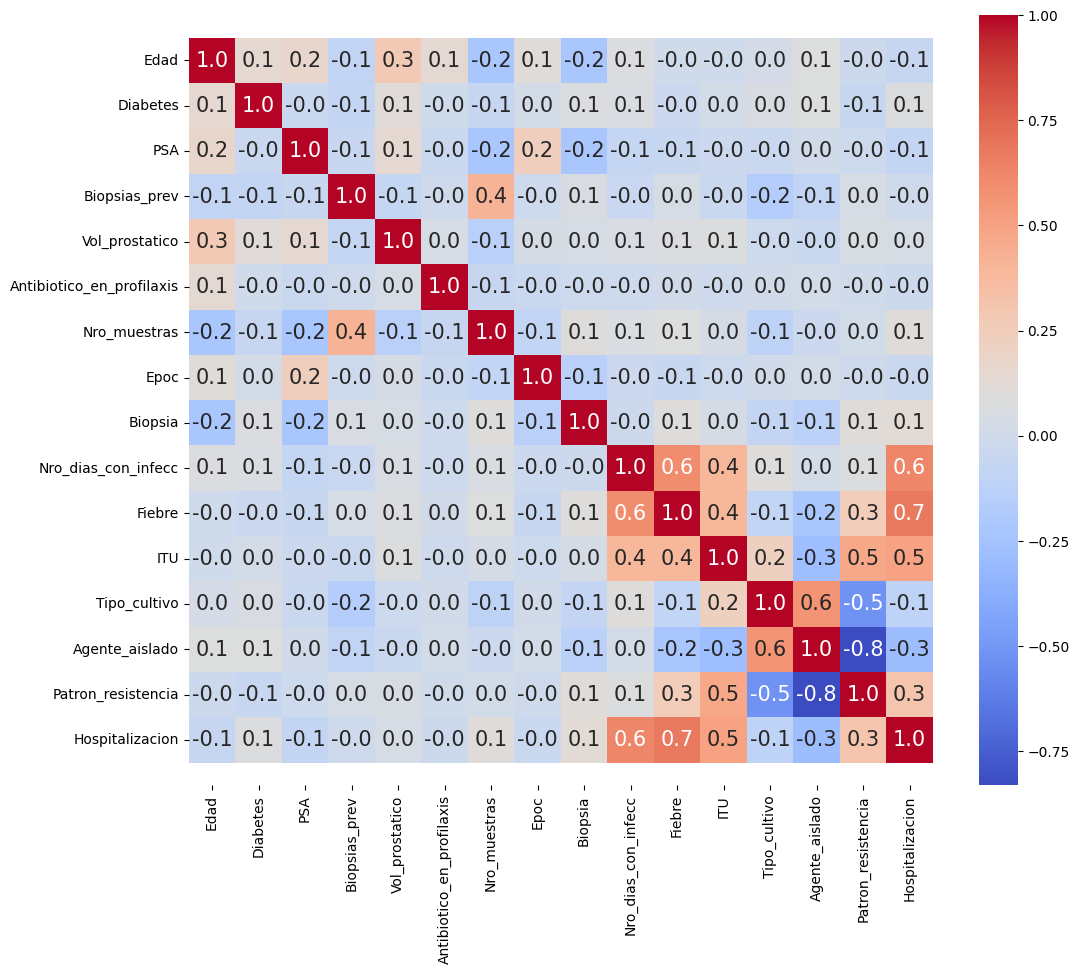

In [29]:
# Calcula la correlación
corr = encoded_df.corr()
# Grafica la correlación
plot_corre_heatmap(corr)

De la matriz se observa que **fiebre** y **nro_dias_con_infecc** tienen alta correlación lineal entre ellas y con la variable objetivo **hospitalizacion**. Se decide eliminar **nro_dias_con_infecc** dado que fiebre es una variable mas fácil de medir.

También se observa una relación bastante fuerte entre **agente_ailado** con **tipo_cultivo** y con **patron_resistencia**, por lo que se decide eliminar *agente_aislado* y *patron_resistencia*.

In [30]:
columnas_a_eliminar = ['Nro_dias_con_infecc', 'Agente_aislado', 'Patron_resistencia']
df = df.drop(columns=columnas_a_eliminar)
encoded_df = encoded_df.drop(columns=columnas_a_eliminar)
df.columns, encoded_df.columns

(Index(['Edad', 'Diabetes', 'PSA', 'Biopsias_prev', 'Vol_prostatico',
        'Antibiotico_en_profilaxis', 'Nro_muestras', 'Epoc', 'Biopsia',
        'Fiebre', 'ITU', 'Tipo_cultivo', 'Hospitalizacion'],
       dtype='object'),
 Index(['Edad', 'Diabetes', 'PSA', 'Biopsias_prev', 'Vol_prostatico',
        'Antibiotico_en_profilaxis', 'Nro_muestras', 'Epoc', 'Biopsia',
        'Fiebre', 'ITU', 'Tipo_cultivo', 'Hospitalizacion'],
       dtype='object'))

Se visualiza nuevamente la matriz de correlación

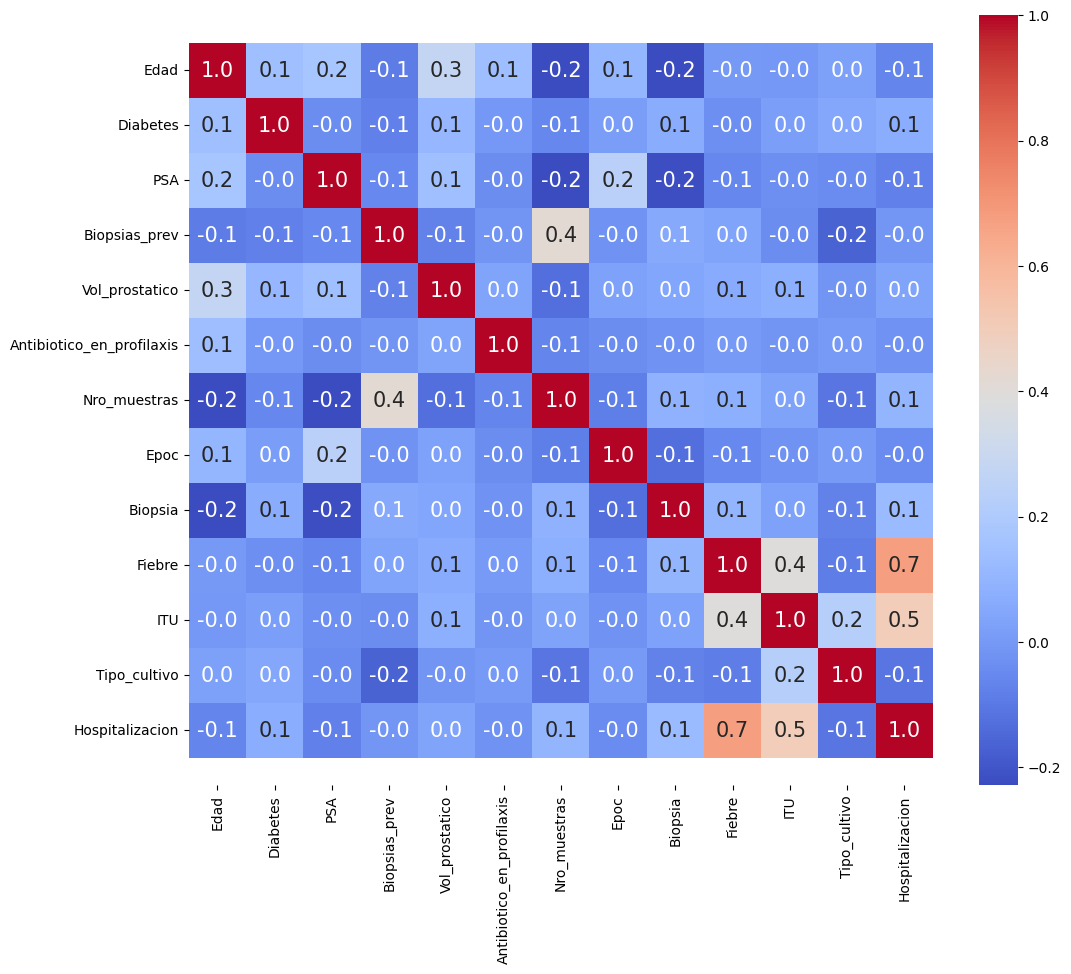

In [32]:
# Calcula la correlación
corr = encoded_df.corr()
# Grafica la correlación
plot_corre_heatmap(corr)

-----------
------------

## Carga de los datos transformados y codificados

Se guarda el dataframe que resultó del análisis exporatorio y el que resulta de codificar las columnas categoricas

In [33]:
df_analizado = 'Datasets/hospitalizacion_analizado.csv'
df_codificado = 'Datasets/hospitalizacion_codificado.csv'

df.to_csv(df_analizado, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_analizado}')
encoded_df.to_csv(df_codificado, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_codificado}')

Se guardó el archivo Datasets/hospitalizacion_analizado.csv
Se guardó el archivo Datasets/hospitalizacion_codificado.csv
